In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from inspect import signature

import torch

In [6]:
dir_name = '/Volumes/UBUNTU 18_0/PAKOVA/outputs/Charades/'
file_name = 'causal_eval_charades_r50_i3d_baseline_32x2_stream_fullyConv_verb_results.npy'

results = np.load(dir_name + file_name, allow_pickle=True)[()]
results.keys()

dict_keys(['map', 'cap', 'map_10', 'cap_10', 'ap', 'prec', 'recall', 'ap_c'])

In [36]:
def plot_pr_curve(p, r, a):
    fig = plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(r, p, color='b', alpha=0.2, where='post')
    plt.fill_between(r, p, alpha=0.2, color='b', **step_kwargs)
    
#     plt.axhline(a)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('PR curve: AP={0:0.2f}'.format(a))
    fig.savefig('/Volumes/UBUNTU 18_0/PAKOVA/outputs/Charades/pr_curve.png')
    plt.show()

In [30]:
prec = results['prec']
recall = results['recall']
ap = results['ap']

In [31]:
for c, ap_i in enumerate(ap):
    print(c, ap_i)

0 0.26863432761590134
1 0.2511833917986043
2 0.5849008192791356
3 0.27581619297821747
4 0.45453209884171253
5 0.35381756150199634
6 0.19539500393557235
7 0.256481458480332
8 0.8680076193680029
9 0.2317917822490994
10 0.5853462026743401
11 0.017172265625580857
12 0.27940792733003816
13 0.12278813171125323
14 0.45612650360631346
15 0.10000626688415683
16 0.4405666529776329
17 0.3693756485414968
18 0.8388640166298368
19 0.29823000311023284
20 0.09589198158109645
21 0.33743636704555807
22 0.19771330803749965
23 0.3880924857295595
24 0.23978590767726796
25 0.21114506501917188
26 0.47530961322014914
27 0.0622811358075719
28 0.2635308396570579
29 0.31800768448413813
30 0.32869492820580265
31 0.5159803931377266
32 0.3966552761339221


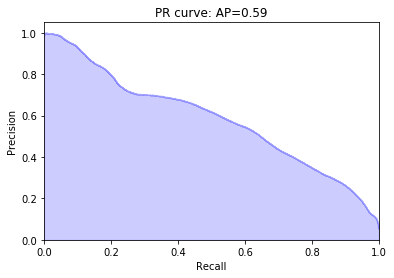

In [43]:
c = 10
plot_pr_curve(prec[:, c], recall[:, c], ap[c])